In [1]:
import nltk

In [2]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [3]:
text= "Hello Mr>Smith Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

In [5]:
print(sent_tokenize(text))

['Hello Mr>Smith Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [6]:
print(word_tokenize(text))

['Hello', 'Mr', '>', 'Smith', 'Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [9]:
from nltk.corpus import stopwords

In [19]:
example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english'))
word_tokens=word_tokenize(example_sent)
filter_word =[word for word in word_tokens if word not in stop_words]
filter_word=[]
for w in word_tokens:
    if w not in stop_words:
        filter_word.append(w)
print(filter_word)

['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [21]:
import nltk
import random
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print(all_words["stupid"])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


(['august', 'and', 'september', 'are', 'a', 'wasteland', 'when', 'it', 'comes', 'to', 'children', "'", 's', 'films', ',', 'and', 'october', 'is', 'a', 'dumping', 'ground', 'for', 'munchkin', 'movies', 'the', 'studios', 'don', "'", 't', 'want', 'to', 'see', 'slaughtered', 'against', 'family', '-', 'oriented', 'thanksgiving', 'films', '.', 'last', 'year', ',', 'the', 'benevolent', 'studio', 'gods', 'gave', 'us', 'digimon', ',', 'and', 'this', 'year', ',', 'they', 'bestow', 'max', 'keeble', "'", 's', 'big', 'move', 'on', 'delighted', 'moviegoers', 'across', 'the', 'country', '.', 'parents', 'will', 'be', 'thrilled', 'because', 'they', "'", 'll', 'finally', 'have', 'something', 'to', 'drag', 'little', 'austin', 'and', 'kayla', 'to', 'see', 'that', 'doesn', "'", 't', 'smell', 'nearly', 'as', 'much', 'like', 'ass', 'as', 'digimon', 'did', '.', 'don', "'", 't', 'get', 'me', 'wrong', '-', 'keeble', ',', 'which', 'is', 'actually', 'only', 'a', '"', 'ment', '"', 'away', 'from', 'being', 'a', 'fe

In [22]:
import numpy as np
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [25]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\DATA SETS\Amazon.xlsx')

df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [28]:
text=df[['reviews.text']]

In [29]:
print(text['reviews.text'][0])

I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

In [30]:
#Cleaning the Data

In [31]:
text['Clean_Data'] = text['reviews.text'].str.lower().str.replace("[^a-z ]",'')
print(text['Clean_Data'][0])

i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have  ppi so the  dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a thi

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
from nltk.corpus import stopwords

In [33]:
stop_words=set(stopwords.words('english'))

In [41]:
def sw(text):
    text=[word for word in text.split() if word not in stop_words]
    return " ".join(text)
text['Filter_text']=text['Clean_Data'].apply(sw)
text.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,reviews.text,Clean_Data,Filter_text
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,say upfront dont like coroporate hermetically ...


In [42]:
# Creating the tf-idf score for split words

In [43]:
tf_idf_vec =TfidfVectorizer()
score =tf_idf_vec.fit_transform(text['Filter_text'])
score

<1597x7363 sparse matrix of type '<class 'numpy.float64'>'
	with 100770 stored elements in Compressed Sparse Row format>

In [46]:
# Creating a dataframe of words and respective TF-IDF score

df_tf_idf = pd.DataFrame(score.toarray(),columns=tf_idf_vec.get_feature_names())
df_tf_idf.head()

,aa,abc,abilities,abilitieswhen,ability,abit,able,aboutconclusionif,abovementioned,absolute,...,zen,zero,zerocons,zink,zip,zippy,zombiesi,zoom,zooming,zumi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Word and their Score

In [59]:
words_tf_idf = df_tf_idf.sum()
words_tf_idf=pd.DataFrame(words_tf_idf).reset_index()
words_tf_idf=words_tf_idf.rename(columns={'index':'Words',0:'Score'})
words_tf_idf=words_tf_idf.sort_values(by='Score',ascending=False)
Top-10_words_tf_idf.head()

,Words,Score
3547,kindle,60.522642
2814,great,56.489598
2431,fire,53.514421
3709,like,47.409148
6015,sound,47.312267


In [61]:
#Creating the Bigram=
tf_idf_bigram = TfidfVectorizer(ngram_range=(2,2))
score_bigram = tf_idf_bigram.fit_transform(text['Filter_text'])
score_bigram

<1597x44036 sparse matrix of type '<class 'numpy.float64'>'
	with 128389 stored elements in Compressed Sparse Row format>

In [64]:
# Creating a dataframe of words and respective TF-IDF score

df_tf_idf_bigram = pd.DataFrame(score_bigram.toarray(), columns=tf_idf_bigram.get_feature_names())

df_tf_idf_bigram

# Word and they score

words_score_tf_idf_bigram = df_tf_idf_bigram.sum()

words_score_tf_idf_bigram = pd.DataFrame(words_score_tf_idf_bigram).reset_index()

words_score_tf_idf_bigram = words_score_tf_idf_bigram.rename(columns={"index" : 'Word', 0 : "Score"})

words_score_tf_idf_bigram.sort_values(by = 'Score', ascending = False).head()

,Word,Score
19809,kindle fire,21.049710
13656,fire hd,15.838693
2418,apples buds,13.341446
13748,fire tv,12.459168
1724,amazon prime,9.720496


In [65]:
# Installing the package

#!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

senti = SentimentIntensityAnalyzer()

In [69]:
# Creating a function to get the polarity for each review

text_polarity = lambda text: senti.polarity_scores(text)['compound']

In [70]:
text['reviews.text'].head().apply(text_polarity)

0    0.9804
1    0.9874
2    0.4364
3    0.9743
4    0.9930
Name: reviews.text, dtype: float64

In [71]:
text['Polarity']=text['reviews.text'].apply(text_polarity)
text.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,reviews.text,Clean_Data,Filter_text,Polarity
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...,0.9804
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...,0.9874
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...,0.4364
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...,0.9743
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,say upfront dont like coroporate hermetically ...,0.9930


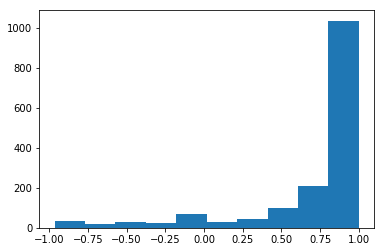

In [72]:
from matplotlib import pyplot as plt

plt.hist(text['Polarity'])

plt.show()

In [73]:
# Categorizing the polarity range

import numpy as np

sentiment_mapping = {1:'Very Bad', 2:'bad', 3:'netural', 4:'good', 5:'very good'}

map_sentiment = lambda val: np.digitize(val,[-1, -0.5, -0.2, 0.2, 0.5])

In [74]:
# Creating a column of sentiment_category in the data

text['sentiment_category'] = text['Polarity'].apply(map_sentiment)

# We need to replace the Sentiment category values by labels

text['label'] = text['sentiment_category'].replace(sentiment_mapping)

text.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,reviews.text,Clean_Data,Filter_text,Polarity,sentiment_category,label
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...,0.9804,5,very good
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...,0.9874,5,very good
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...,0.4364,4,good
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...,0.9743,5,very good
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,say upfront dont like coroporate hermetically ...,0.9930,5,very good
